## Reading the data

In [ ]:
# link for download the data
# wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing_df = pd.read_csv('housing.csv')

In [3]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Features
For the rest of the homework, you'll need to use only these columns:

        'latitude',
        'longitude',
        'housing_median_age',
        'total_rooms',
        'total_bedrooms',
        'population',
        'households',
        'median_income',
        'median_house_value',
        'ocean_proximity',

In [4]:
housing_df = housing_df[['latitude',
                        'longitude',
                        'housing_median_age',
                        'total_rooms',
                        'total_bedrooms',
                        'population',
                        'households',
                        'median_income',
                        'median_house_value',
                        'ocean_proximity']]

In [5]:
housing_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data preparation

In [7]:
housing_df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
housing_df.fillna(value=0, inplace=True)

In [10]:
housing_df.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
housing_df.dtypes

latitude              float64
longitude             float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [13]:
housing_df['rooms_per_household'] = housing_df['total_rooms'] / housing_df['households']

In [14]:
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms'] / housing_df['total_rooms']

In [15]:
housing_df['population_per_household'] = housing_df['population'] / housing_df['households']

In [16]:
housing_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


#### Question 1
What is the most frequent observation (mode) for the column ocean_proximity?
        
    <1H OCEAN

In [18]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Spliting the data

In [19]:
from sklearn.model_selection import train_test_split

In [23]:
full_train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=42)

In [24]:
full_train_df.shape, test_df.shape

((16512, 13), (4128, 13))

In [22]:
20 / 80

0.25

In [25]:
train_df, val_df = train_test_split(full_train_df, test_size=0.25, random_state=42)

In [26]:
train_df.shape, val_df.shape

((12384, 13), (4128, 13))

In [29]:
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [30]:
# target variable: median_house_value
y_train = train_df.median_house_value.values
y_val = val_df.median_house_value.values
y_test = test_df.median_house_value.values

del train_df['median_house_value']
del val_df['median_house_value']
del test_df['median_house_value']

In [31]:
train_df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [32]:
# saving the y varable for the full train dataset
y_full_train = full_train_df.median_house_value.values

In [33]:
X_full_train_df = full_train_df.copy()
del X_full_train_df['median_house_value']

In [39]:
numerical = list(train_df.dtypes[train_df.dtypes != 'object'].index)
numerical

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [44]:
# pearson correlation
corr_mat = train_df[numerical].corr()
corr_mat

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.925005,0.002477,-0.025914,-0.059730,-0.100272,-0.063529,-0.076805,0.119118,-0.124507,-0.002301
longitude,-0.925005,1.000000,-0.099812,0.036449,0.063840,0.091670,0.049762,-0.016426,-0.034814,0.102320,0.011022
housing_median_age,0.002477,-0.099812,1.000000,-0.363522,-0.324156,-0.292476,-0.306119,-0.119591,-0.181275,0.129456,0.012167
total_rooms,-0.025914,0.036449,-0.363522,1.000000,0.931546,0.853219,0.921441,0.198951,0.168926,-0.194185,-0.029452
total_bedrooms,-0.059730,0.063840,-0.324156,0.931546,1.000000,0.877340,0.979399,-0.009833,0.010381,0.078094,-0.034301
population,-0.100272,0.091670,-0.292476,0.853219,0.877340,1.000000,0.906841,-0.000849,-0.076210,0.031592,0.064998
households,-0.063529,0.049762,-0.306119,0.921441,0.979399,0.906841,1.000000,0.011925,-0.085832,0.058004,-0.032522
median_income,-0.076805,-0.016426,-0.119591,0.198951,-0.009833,-0.000849,0.011925,1.000000,0.394154,-0.616617,-0.000454
rooms_per_household,0.119118,-0.034814,-0.181275,0.168926,0.010381,-0.076210,-0.085832,0.394154,1.000000,-0.500589,0.001801
bedrooms_per_room,-0.124507,0.102320,0.129456,-0.194185,0.078094,0.031592,0.058004,-0.616617,-0.500589,1.000000,-0.002851


#### Question 2

What are the two features that have the biggest correlation in this dataset?

    total_bedrooms       households           0.979399

In [51]:
# solution from https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/

# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values(ascending=False)
sorted_mat[sorted_mat.values != 1.0]

total_bedrooms       households           0.979399
households           total_bedrooms       0.979399
total_bedrooms       total_rooms          0.931546
total_rooms          total_bedrooms       0.931546
households           total_rooms          0.921441
                                            ...   
rooms_per_household  bedrooms_per_room   -0.500589
median_income        bedrooms_per_room   -0.616617
bedrooms_per_room    median_income       -0.616617
longitude            latitude            -0.925005
latitude             longitude           -0.925005
Length: 110, dtype: float64

## Make median_house_value binary

In [89]:
train_mean = y_full_train.mean()
train_mean

207194.6937378876

In [97]:
y_train >= train_mean

array([ True,  True, False, ...,  True, False, False])

In [98]:
above_average = (y_train >= train_mean).astype('int')
above_average

array([1, 1, 0, ..., 1, 0, 0])

#### Question 3
What is the value of mutual information?
    
    0.1

In [92]:
from sklearn.metrics import mutual_info_score

In [99]:
train_df.dtypes[train_df.dtypes == 'object']

ocean_proximity    object
dtype: object

In [100]:
train_df.ocean_proximity.values[:5]

array(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', '<1H OCEAN', 'NEAR OCEAN'],
      dtype=object)

In [101]:
mi_score = mutual_info_score(train_df.ocean_proximity.values, above_average)
round(mi_score, 2)

0.1

## Training Losgistic Regression

### One-Hot Encoding the feature ocean_proximity

In [72]:
from sklearn.feature_extraction import DictVectorizer

In [80]:
train_dicts = train_df[numerical + ['ocean_proximity']].to_dict(orient='records')

In [81]:
train_dicts[:2]

[{'latitude': 34.43,
  'longitude': -119.67,
  'housing_median_age': 39.0,
  'total_rooms': 1467.0,
  'total_bedrooms': 381.0,
  'population': 1404.0,
  'households': 374.0,
  'median_income': 2.3681,
  'rooms_per_household': 3.9224598930481283,
  'bedrooms_per_room': 0.25971370143149286,
  'population_per_household': 3.7540106951871657,
  'ocean_proximity': '<1H OCEAN'},
 {'latitude': 33.74,
  'longitude': -118.32,
  'housing_median_age': 24.0,
  'total_rooms': 6097.0,
  'total_bedrooms': 794.0,
  'population': 2248.0,
  'households': 806.0,
  'median_income': 10.1357,
  'rooms_per_household': 7.564516129032258,
  'bedrooms_per_room': 0.13022798097424962,
  'population_per_household': 2.7890818858560795,
  'ocean_proximity': 'NEAR OCEAN'}]

In [86]:
val_dicts = val_df[numerical + ['ocean_proximity']].to_dict(orient='records')

In [82]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [84]:
X_train[0]

array([ 2.59713701e-01,  3.74000000e+02,  3.90000000e+01,  3.44300000e+01,
       -1.19670000e+02,  2.36810000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.40400000e+03,
        3.75401070e+00,  3.92245989e+00,  3.81000000e+02,  1.46700000e+03])

In [87]:
X_val = dv.transform(val_dicts)

In [85]:
from sklearn.linear_model import LogisticRegression

In [88]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, above_average)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [110]:
val_above_average = (y_val >= train_mean).astype('int')

In [111]:
val_above_average

array([0, 0, 1, ..., 1, 1, 0])

#### Question 4
Accuracy on the validation dataset

    0.84

In [104]:
from sklearn.metrics import accuracy_score

In [106]:
# 0 | 1
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.07847128, 0.16795741, 0.95304104, ..., 0.96103024, 0.85404741,
       0.46588232])

In [109]:
price_decision = (y_pred >= 0.5).astype('int')
price_decision

array([0, 0, 1, ..., 1, 1, 0])

In [113]:
val_score = accuracy_score(val_above_average, price_decision)
round(val_score, 2)

0.84

## Finding the least useful feature using the feature elimination technique

In [115]:
dv = DictVectorizer(sparse=False)
train_dicts = train_df[numerical + ['ocean_proximity']].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = val_df[numerical + ['ocean_proximity']].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [123]:
dv.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY',
       'ocean_proximity=NEAR OCEAN', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [119]:
X_train[0]

array([ 2.59713701e-01,  3.74000000e+02,  3.90000000e+01,  3.44300000e+01,
       -1.19670000e+02,  2.36810000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.40400000e+03,
        3.75401070e+00,  3.92245989e+00,  3.81000000e+02,  1.46700000e+03])

In [135]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, above_average)

val_score_base = accuracy_score(val_above_average, price_decision)
print(f'Validation accuracy score with all the features: {val_score_base}')

Validation accuracy score with all the features: 0.8357558139534884


In [141]:
features_lst = list(train_df.columns)
num_features = len(features_lst)

print(features_lst)
print()
print(num_features)

['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

12


### Evaluating the model over the combination of some features

In [144]:
count = num_features

val_score_dict = {}
val_scores_diff_dict = {}

while count >= 1:
    features_used = features_lst[: count]
    print(features_used)
    print()
    
    dv = DictVectorizer(sparse=False)
    train_dicts = train_df[features_used].to_dict(orient='records')
    X_train = dv.fit_transform(train_dicts)

    val_dicts = val_df[features_used].to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, above_average)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    price_decision = (y_pred >= 0.5).astype('int')
    
    val_above_average = (y_val >= train_mean).astype('int')

    val_score = accuracy_score(val_above_average, price_decision)
    val_score_dict.update({count: (features_used, val_score)})
    print(f'Validation accuracy score with {count} features: {val_score}')
    
    val_score_diff = val_score_base - val_score
    val_scores_diff_dict.update({count: val_score_diff})
    print(f'Validation DIFF accuracy score with {count} features: {val_score_diff}')
    
    print()
    print('----------')
    
    count = count - 1

['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

Validation accuracy score with 12 features: 0.8359980620155039
Validation DIFF accuracy score with 12 features: -0.0002422480620154488

----------
['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room']

Validation accuracy score with 11 features: 0.8367248062015504
Validation DIFF accuracy score with 11 features: -0.0009689922480620172

----------
['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'rooms_per_household']

Validation accuracy score with 10 features: 0.8355135658914729
Validation DIFF accuracy score with 10 features: 0.000242248062015

In [147]:
val_score_dict = {}
val_scores_diff_dict = {}

for feature in features_lst:
    print(feature)
    print()
    
    dv = DictVectorizer(sparse=False)
    train_dicts = train_df[[feature]].to_dict(orient='records')
    X_train = dv.fit_transform(train_dicts)

    val_dicts = val_df[[feature]].to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, above_average)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    price_decision = (y_pred >= 0.5).astype('int')
    
    val_above_average = (y_val >= train_mean).astype('int')

    val_score = accuracy_score(val_above_average, price_decision)
    val_score_dict.update({feature: val_score})
    print(f'Validation accuracy score: {val_score}')
    
    val_score_diff = val_score_base - val_score
    val_scores_diff_dict.update({feature: val_score_diff})
    print(f'Validation DIFF accuracy score: {val_score_diff}')
    
    print()
    print('----------')
    

latitude

Validation accuracy score: 0.5920542635658915
Validation DIFF accuracy score: 0.2437015503875969

----------
longitude

Validation accuracy score: 0.5920542635658915
Validation DIFF accuracy score: 0.2437015503875969

----------
housing_median_age

Validation accuracy score: 0.5920542635658915
Validation DIFF accuracy score: 0.2437015503875969

----------
total_rooms

Validation accuracy score: 0.592296511627907
Validation DIFF accuracy score: 0.24345930232558144

----------
total_bedrooms

Validation accuracy score: 0.5949612403100775
Validation DIFF accuracy score: 0.24079457364341095

----------
population

Validation accuracy score: 0.5920542635658915
Validation DIFF accuracy score: 0.2437015503875969

----------
households

Validation accuracy score: 0.596656976744186
Validation DIFF accuracy score: 0.23909883720930236

----------
median_income

Validation accuracy score: 0.7693798449612403
Validation DIFF accuracy score: 0.06637596899224807

----------
ocean_proximity



In [153]:
list(val_scores_diff_dict.items())

[('latitude', 0.2437015503875969),
 ('longitude', 0.2437015503875969),
 ('housing_median_age', 0.2437015503875969),
 ('total_rooms', 0.24345930232558144),
 ('total_bedrooms', 0.24079457364341095),
 ('population', 0.2437015503875969),
 ('households', 0.23909883720930236),
 ('median_income', 0.06637596899224807),
 ('ocean_proximity', 0.17829457364341095),
 ('rooms_per_household', 0.21899224806201556),
 ('bedrooms_per_room', 0.14631782945736438),
 ('population_per_household', 0.22965116279069775)]

#### Question 5
Which of following feature has the smallest difference?

    households


In [155]:
val_scores_diff_dict['total_rooms'], val_scores_diff_dict['total_bedrooms'], val_scores_diff_dict['population'], val_scores_diff_dict['households']

(0.24345930232558144,
 0.24079457364341095,
 0.2437015503875969,
 0.23909883720930236)

## Using Linear Regression with sklearn

In [156]:
train_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [158]:
y_train[:5]

array([241400., 500001.,  64100., 277200., 417000.])

In [157]:
val_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,36.74,-119.85,35.0,1191.0,190.0,537.0,182.0,3.5375,INLAND,6.543956,0.159530,2.950549
1,41.02,-124.16,23.0,1672.0,385.0,1060.0,390.0,2.1726,NEAR OCEAN,4.287179,0.230263,2.717949
2,33.67,-117.92,14.0,6224.0,1679.0,3148.0,1589.0,4.2071,<1H OCEAN,3.916929,0.269762,1.981120
3,34.15,-118.45,10.0,1091.0,260.0,517.0,266.0,4.1727,<1H OCEAN,4.101504,0.238313,1.943609
4,33.63,-117.90,28.0,2370.0,352.0,832.0,347.0,7.1148,<1H OCEAN,6.829971,0.148523,2.397695


In [159]:
y_val[:5]

array([ 96700.,  75500., 430900., 332600., 500001.])

In [161]:
test_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,36.06,-119.01,25.0,1505.0,0.0,1392.0,359.0,1.6812,INLAND,4.192201,0.0,3.877437
1,35.14,-119.46,30.0,2943.0,0.0,1565.0,584.0,2.5313,INLAND,5.039384,0.0,2.679795
2,37.80,-122.44,52.0,3830.0,0.0,1310.0,963.0,3.4801,NEAR BAY,3.977155,0.0,1.360332
3,34.28,-118.72,17.0,3051.0,0.0,1705.0,495.0,5.7376,<1H OCEAN,6.163636,0.0,3.444444
4,36.62,-121.93,34.0,2351.0,0.0,1063.0,428.0,3.7250,NEAR OCEAN,5.492991,0.0,2.483645


In [162]:
y_test[:5]

array([ 47700.,  45800., 500001., 218600., 278000.])

In [164]:
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

In [167]:
# distribution of price
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

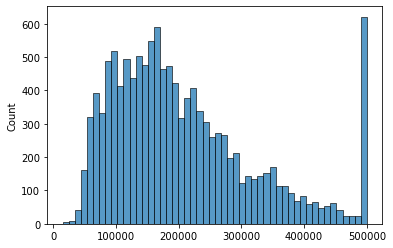

In [170]:
sns.histplot(y_train, bins=50) 
plt.show()

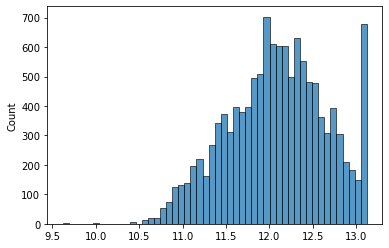

In [169]:
sns.histplot(y_train_log, bins=50) 
plt.show()

#### Question 6
This model has a parameter alpha. Let's try the following values: $[0, 0.01, 0.1, 1, 10]$
Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

    (0, 0.524063570701514)

In [173]:
from sklearn.linear_model import Ridge # Linear least squares with l2 regularization

from sklearn.metrics import mean_squared_error as mse

In [177]:
rmse_lst = []

for a in [0, 0.01, 0.1, 1, 10]:

    dv = DictVectorizer(sparse=False)
    train_dicts = train_df[numerical + ['ocean_proximity']].to_dict(orient='records')
    X_train = dv.fit_transform(train_dicts)

    val_dicts = val_df[numerical + ['ocean_proximity']].to_dict(orient='records')  
    X_val = dv.transform(val_dicts)
    
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train_log)
    
    y_predict = model.predict(X_val)
    
    rmse = np.sqrt(mse(y_val_log, y_predict))
    
    rmse_lst.append((a, rmse))
    print(f'a = {a}')
    print(f'RMSE on validation dataset: {rmse.round(3)}')
    print()

a = 0
RMSE on validation dataset: 0.524

a = 0.01
RMSE on validation dataset: 0.524

a = 0.1
RMSE on validation dataset: 0.524

a = 1
RMSE on validation dataset: 0.524

a = 10
RMSE on validation dataset: 0.524



In [185]:
min(rmse_lst, key=lambda x: x[1])

(0, 0.524063570701514)